Q1. Pick stocks of your choice, perform the following tasks.

    Download the stock closing price from Jan 1, 2021 – Dec 31, 2024 and plot the price graph
    Construct the 10-, 20-, and 60-day moving averages.
    Use the averages to identify some of the trading (buy/sell) opportunities.   
    Discuss your findings.
    Pick a period, identift the resistence level and support level. Does the relevant trading signal work in this case?  

Q2.  Use the time period from 2018 to 2024, repeat the part of
'Stylied facts of asset returns' in the 'MMA823 - Session 2 - FactorPricingModels' notebook.
Explain the meaning of those facts and discuss your findings. In addition to the SP500 index,
you ahould also include a single stock of your choice to see if the findings also apply to single stocks.

#Question 1

In [1]:
 # stock picked: Samsung

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

%matplotlib inline
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(precision=4)

import yfinance as yf

start_date = '2021-01-01'
end_date = '2024-12-31'
stocks = ['005930.KS'] # Samsung Electronics (KRX)
df = yf.download(stocks, start_date, end_date, auto_adjust=True)['Close']
df.head(5)

ModuleNotFoundError: No module named 'matplotlib'

<Axes: xlabel='Date'>

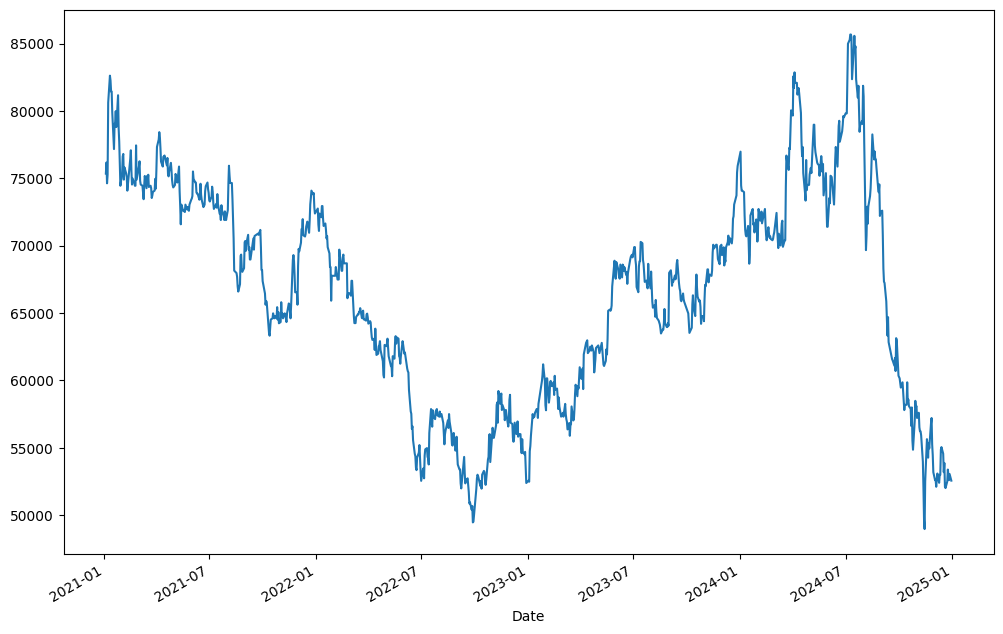

In [ ]:
# plot the price graph

df['005930.KS'].plot(figsize=(12,8))

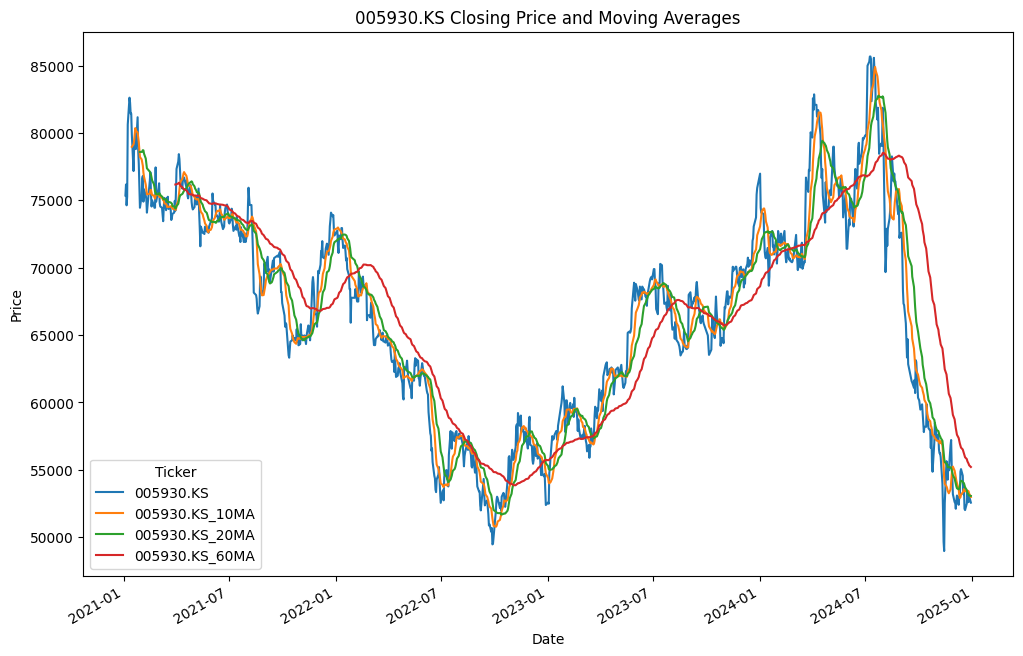

In [ ]:
# Moving Averages

df['005930.KS_10MA'] = df['005930.KS'].rolling(window=10).mean()
df['005930.KS_20MA'] = df['005930.KS'].rolling(window=20).mean()
df['005930.KS_60MA'] = df['005930.KS'].rolling(window=60).mean()

df[['005930.KS', '005930.KS_10MA', '005930.KS_20MA', '005930.KS_60MA']].plot(figsize=(12, 8))
plt.title('005930.KS Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

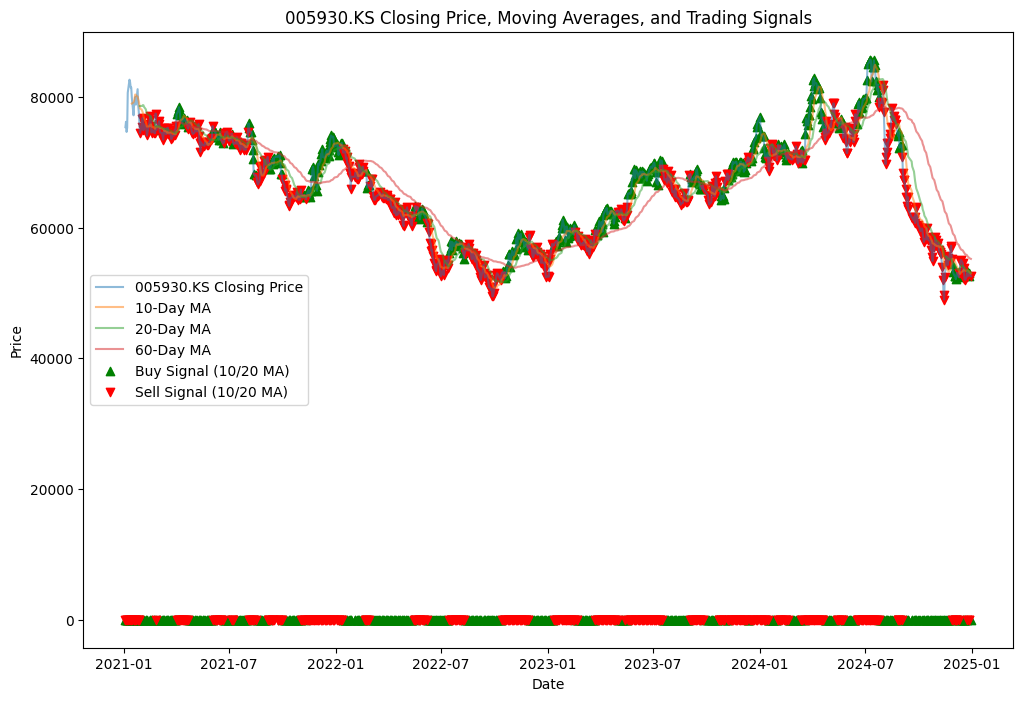

Ticker,005930.KS,005930.KS_10MA,005930.KS_20MA,Trading_Signal_10_20,Trading_Signal_20_60
Date,,,,,
2021-01-29,74454.047,78222.160,78598.970,-1.0,0.0
2021-02-01,75362.047,78040.566,78598.970,-1.0,0.0
2021-02-02,76633.188,77804.490,78621.669,-1.0,0.0
2021-02-03,76814.805,77568.416,78730.626,-1.0,0.0
2021-02-04,74908.055,77059.949,78712.468,-1.0,0.0


In [ ]:
# Identify trading opportunities using moving averages

# Simple Crossover Strategy: 10-day MA crossing above 20-day MA (Buy Signal) and below (Sell Signal)
df['Buy_Signal_10_20'] = np.where(df['005930.KS_10MA'] > df['005930.KS_20MA'], 1.0, 0.0)
df['Sell_Signal_10_20'] = np.where(df['005930.KS_10MA'] < df['005930.KS_20MA'], -1.0, 0.0)
df['Trading_Signal_10_20'] = df['Buy_Signal_10_20'] + df['Sell_Signal_10_20']

# Crossover Strategy: 20-day MA crossing above 60-day MA (Buy Signal) and below (Sell Signal)
df['Buy_Signal_20_60'] = np.where(df['005930.KS_20MA'] > df['005930.KS_60MA'], 1.0, 0.0)
df['Sell_Signal_20_60'] = np.where(df['005930.KS_20MA'] < df['005930.KS_60MA'], -1.0, 0.0)
df['Trading_Signal_20_60'] = df['Buy_Signal_20_60'] + df['Sell_Signal_20_60']

# Plotting the signals along with the price and moving averages
plt.figure(figsize=(12, 8))
plt.plot(df['005930.KS'], label='005930.KS Closing Price', alpha=0.5)
plt.plot(df['005930.KS_10MA'], label='10-Day MA', alpha=0.5)
plt.plot(df['005930.KS_20MA'], label='20-Day MA', alpha=0.5)
plt.plot(df['005930.KS_60MA'], label='60-Day MA', alpha=0.5)

# Plotting buy and sell signals for 10-20 MA crossover
plt.scatter(df.index, df['005930.KS'] * df['Buy_Signal_10_20'], label='Buy Signal (10/20 MA)', marker='^', color='g', alpha=1)
plt.scatter(df.index, df['005930.KS'] * abs(df['Sell_Signal_10_20']), label='Sell Signal (10/20 MA)', marker='v', color='r', alpha=1)

plt.title('005930.KS Closing Price, Moving Averages, and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Display the DataFrame with signals (first few rows where signals appear)
display(df[['005930.KS', '005930.KS_10MA', '005930.KS_20MA', 'Trading_Signal_10_20', 'Trading_Signal_20_60']].dropna().head())

### Discussion of Trading Opportunities using Moving Averages


Moving averages are among the most widely used technical indicators in financial analysis, primarily because they smooth out daily price fluctuations and help identify underlying trends in asset prices. Traders often analyze the interactions between short-term and long-term moving averages to detect potential shifts in momentum. When a shorter-term average rises above a longer-term one, it can indicate that bullish momentum is building; conversely, when it falls below, it can suggest that bearish momentum is taking over.

In this analysis, two common crossover strategies are examined: the 10-day and 20-day moving average crossover and the 20-day and 60-day moving average crossover. The 10-day and 20-day crossover is typically used to capture shorter-term trading signals. A buy signal occurs when the 10-day moving average crosses above the 20-day moving average, suggesting upward momentum and a possible price increase. Conversely, a sell signal is generated when the 10-day moving average crosses below the 20-day moving average, indicating a potential shift toward downward momentum. The 20-day and 60-day crossover works on a similar principle but operates on a longer timescale. When the 20-day moving average crosses above the 60-day moving average, it is generally interpreted as a bullish signal, while a cross below signals a bearish trend. Because these moving averages span longer periods, such crossovers tend to be viewed as stronger and more reliable indicators of broader trend changes.

The generated plot for Samsung illustrates these moving averages alongside the corresponding buy and sell signals. The chart displays the daily closing prices together with the 10-day, 20-day, and 60-day moving averages. Buy signals, shown as green upward-pointing triangles, mark instances when the short-term moving average crosses above the longer-term one, while sell signals, marked by red downward-pointing triangles, indicate the opposite. By examining these markers, we can assess whether the crossover points tend to align with subsequent price movements. In several cases, buy signals appear just before periods of sustained price increase, while sell signals precede short-term declines. This pattern supports the premise that moving average crossovers can identify meaningful changes in momentum, though the signals are not always perfectly timed.

However, it is important to acknowledge the limitations of moving average strategies. Moving averages are lagging indicators, meaning that they react to price changes only after those movements have already occurred. As a result, signals may arrive too late to capture the optimal entry or exit point. In volatile markets, crossovers may generate false signals, causing traders to enter or exit positions prematurely. Therefore, moving averages should be used in conjunction with other indicators, such as relative strength index (RSI), volume analysis, or trend confirmation tools, to improve reliability. Moreover, the effectiveness of these strategies varies across different market environments and individual stocks. For instance, in trending markets, crossovers may perform well, while in sideways or choppy conditions, they often lead to whipsaw trades.

Overall, the moving average crossover analysis for Samsung suggests that this strategy can capture general shifts in price direction but should be applied cautiously. While many of the buy and sell signals correspond with meaningful changes in Samsung’s stock trend, the inherent lag and occasional false reversals highlight the importance of combining technical signals with broader market context and risk management considerations.

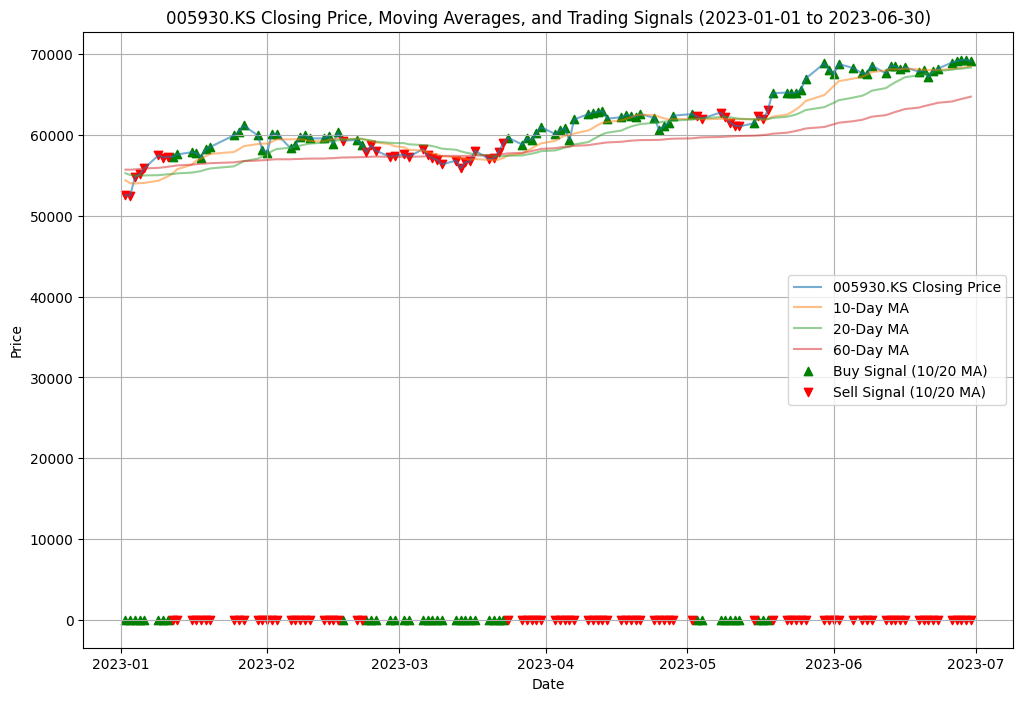

In [ ]:
# Filter data for the specified period
start_period = '2023-01-01'
end_period = '2023-06-30'
df_period = df.loc[start_period:end_period]

# Plot the price and moving averages for the specified period
plt.figure(figsize=(12, 8))
plt.plot(df_period['005930.KS'], label='005930.KS Closing Price', alpha=0.6)
plt.plot(df_period['005930.KS_10MA'], label='10-Day MA', alpha=0.5)
plt.plot(df_period['005930.KS_20MA'], label='20-Day MA', alpha=0.5)
plt.plot(df_period['005930.KS_60MA'], label='60-Day MA', alpha=0.5)

# Plotting buy and sell signals for 10-20 MA crossover within the period
plt.scatter(df_period.index, df_period['005930.KS'] * df_period['Buy_Signal_10_20'], label='Buy Signal (10/20 MA)', marker='^', color='g', alpha=1)
plt.scatter(df_period.index, df_period['005930.KS'] * abs(df_period['Sell_Signal_10_20']), label='Sell Signal (10/20 MA)', marker='v', color='r', alpha=1)

plt.title(f'005930.KS Closing Price, Moving Averages, and Trading Signals ({start_period} to {end_period})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Discuss findings about resistance and support levels and signal effectiveness in a markdown cell






### Resistance and Support Levels Analysis (January 1, 2023 - June 30, 2023)

Based on the plot for the period from January 1, 2023, to June 30, 2023:

*   **Identify Resistance Levels:** Look for price levels where the stock price has repeatedly struggled to break above. These act as potential selling points as upward momentum meets selling pressure.
*   **Identify Support Levels:** Look for price levels where the stock price has repeatedly found buying interest and bounced back up after a decline. These act as potential buying points as downward momentum meets buying pressure.

**Analysis of Trading Signals within the Period:**

Now, examine the buy and sell signals generated by the 10-day and 20-day moving average crossover strategy within this specific timeframe.

*   Observe where the buy (green triangles) and sell (red triangles) signals appear relative to the identified resistance and support levels.
*   Consider whether the buy signals occurred near support levels and if the price subsequently moved upwards.
*   Consider whether the sell signals occurred near resistance levels and if the price subsequently moved downwards.
*   Discuss whether the trading signals generated by the moving average crossover strategy were effective in identifying profitable trading opportunities during this specific period. Note any instances of false signals or missed opportunities.

Based on your observations, summarize your findings on the effectiveness of the moving average trading signals in relation to the resistance and support levels identified in the January 1, 2023 to June 30, 2023 period for 005930.KS.

###Resistance Levels Identified:
######Strongest resistance (major multi-year high): ₩96,800 — the January 2021 all-time high

######Secondary Resistance:  ₩80,000 - ₩86,000 — area where price encountered repeated supply / stalled rallies later in the period

######Mid-period Resistance: ₩60,000 - ₩75,000 — a cluster zone of intermediate peaks and reaction highs between the 2021 high and the end-2024 trough

###Long-term Trend Signals:
######Peak Formation and Structural Downtrend (2021-2023)

######Sector and Earnings Weakness Reinforce the Trend (2022- 2023)

######Oversold and Capitulation Indicators (Late 2022 - Early 2023)

######Early Signs of Recovery (2024)

######End-2024 Status: Base Formation; on the way to New Bull Trend


#Question 2

In [ ]:
start_date = '2018-01-01'
end_date = '2024-12-31'
stocks = ['005930.KS']
df = yf.download(stocks, start_date, end_date, auto_adjust=True)['Close']
df.head(5)

[*********************100%***********************]  1 of 1 completed


Ticker,005930.KS
Date,
2018-01-02,41677.133
2018-01-03,42167.270
2018-01-04,41726.156
2018-01-05,42575.703
2018-01-08,42494.004


### Fact 1 - distribution of returns

In [ ]:
import scipy.stats as scs

df['log_rtn'] = np.log(df['005930.KS'] / df['005930.KS'].shift(1))

r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

2. Plot the histogram and the Q-Q Plot

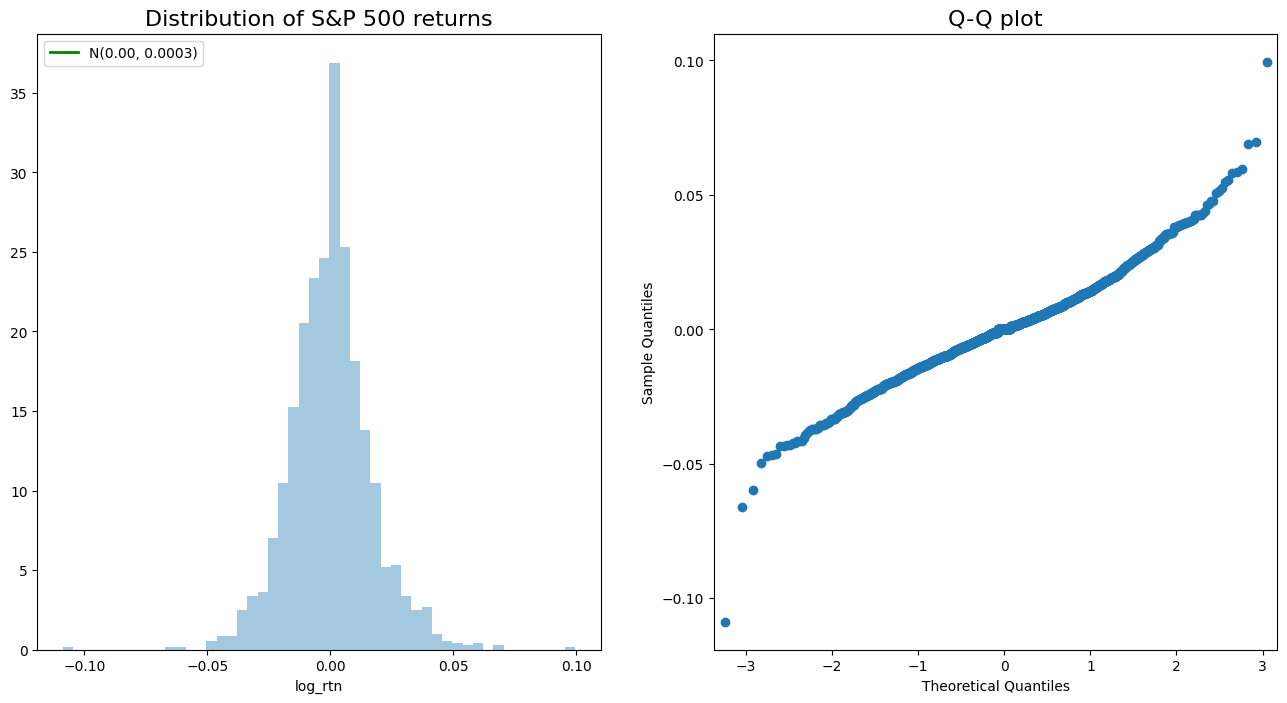

In [ ]:
import seaborn as sns
import statsmodels.api as sm

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of S&P 500 returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

3. Print the summary statistics of the log returns

In [ ]:
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}')
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 2018-01-02 - 2024-12-30
Number of observations: 1719
Mean: 0.0001
Median: 0.0000
Min: -0.1087
Max: 0.0996
Standard Deviation: 0.0166
Skewness: 0.1905
Kurtosis: 2.6502
Jarque-Bera statistic: nan with p-value: nan


### Fact 2 - Volatility Clustering

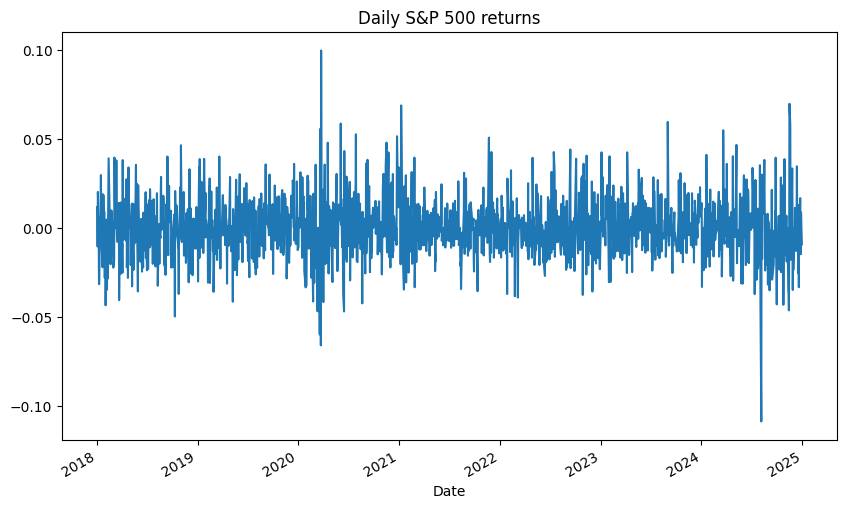

In [ ]:
df.log_rtn.plot(title='Daily S&P 500 returns', figsize=(10, 6))

plt.show()

### Fact 3 - Absence of autocorrelation in returns

1. Define the parameters for creating the Autocorrelation plots

In [ ]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

2. Run the following code to create ACF plot of log returns

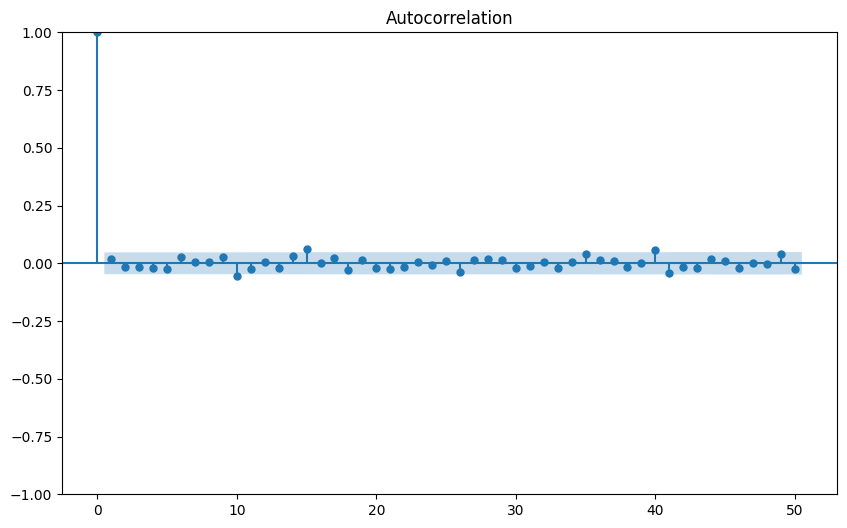

In [ ]:
import statsmodels.tsa.api as smt

# Remove rows with NaN values in log_rtn before plotting
acf = smt.graphics.plot_acf(df.log_rtn.dropna(),
                            lags=N_LAGS,
                            alpha=SIGNIFICANCE_LEVEL)
plt.show()

### Fact 4 - Small and decreasing autocorrelation in squared/absolute returns

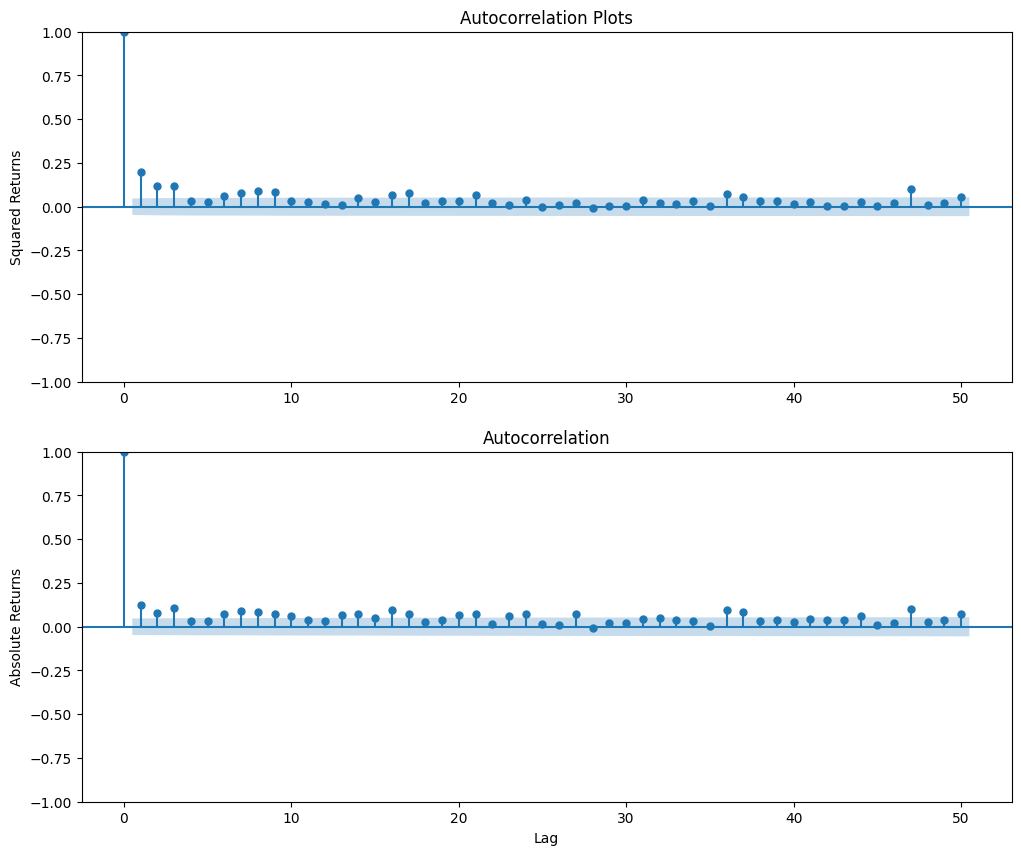

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

smt.graphics.plot_acf(df.log_rtn.dropna() ** 2, lags=N_LAGS,
                      alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
          ylabel='Squared Returns')

smt.graphics.plot_acf(np.abs(df.log_rtn.dropna()), lags=N_LAGS,
                      alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
          xlabel='Lag')
plt.show()

### Fact 5 - Leverage effect

1. Calculate volatility measures as moving standard deviations

In [ ]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

2. Plot all the series

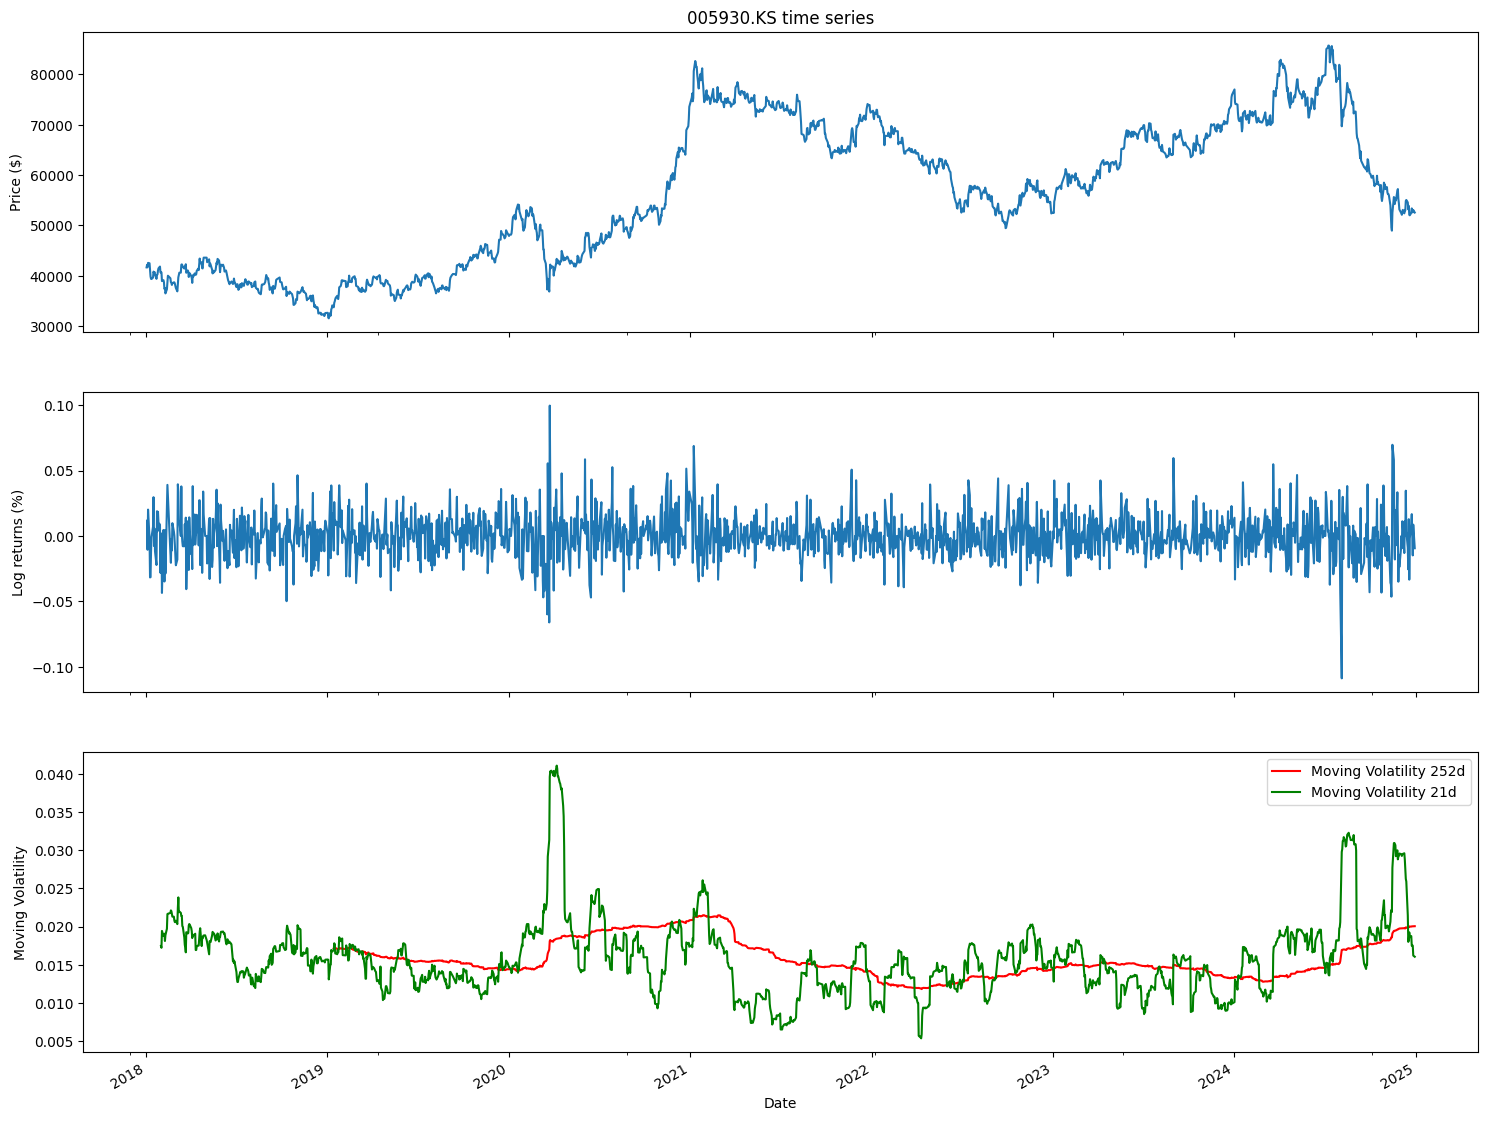

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
                       sharex=True)

df['005930.KS'].plot(ax=ax[0])
ax[0].set(title='005930.KS time series',
          ylabel='Price ($)')

df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')

df.moving_std_252.plot(ax=ax[2], color='r',
                       label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
                      label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
          xlabel='Date')
ax[2].legend()

plt.show()

The first graph displays the 005930.KS time series from 2018 to 2024, showing the evolution of Samsung’s stock price over time. The series exhibits a strong upward trend, especially from 2019 to 2021, followed by short periods of corrections and consolidations before resuming growth. The long-run increase in price reflects the company’s sustained earnings performance and broader market appreciation for technology firms over the past decade. However, the path is far from smooth—there are frequent short-term fluctuations and noticeable drawdowns, such as those observed around early 2020 during the COVID-19 market shock. This visual pattern highlights that stock prices are non-stationary, meaning they tend to drift upward over time due to cumulative returns, inflation, and growth expectations, while short-run deviations are driven by daily news and investor sentiment.

The second graph, which plots log returns, transforms the price series into percentage changes, thereby removing the non-stationary trend and revealing the more stable, mean-reverting nature of returns. Here, Samsung’s daily log returns are centered roughly around zero, implying that gains and losses are distributed symmetrically over time, with no persistent drift in either direction. However, large spikes appear intermittently, corresponding to sudden market movements or firm-specific events, such as earnings announcements or macroeconomic shocks. These spikes confirm one of the fundamental stylized facts of financial markets—returns are not normally distributed but instead exhibit fat tails, meaning that extreme events occur more frequently than a normal model would predict. The distribution of these returns appears random, supporting the idea that short-term price changes are difficult to forecast, consistent with the efficient market hypothesis. Yet, the fact that clusters of large positive or negative returns tend to occur close together reveals volatility clustering, where periods of turbulence are followed by more turbulence.

The third graph illustrates this phenomenon more clearly through the moving volatility plots, showing both a short-term (21-day) and long-term (252-day) rolling measure of return variability. The green line, representing short-term volatility, fluctuates more sharply, while the red line, showing long-term volatility, moves more smoothly, reflecting broader trends. Notably, volatility spikes prominently around early 2020, capturing the heightened uncertainty of the pandemic period, and then gradually declines before rising again during the 2022 market correction. This pattern indicates that while returns themselves may not be predictable, the magnitude of their variability is persistent—high-volatility periods tend to cluster together, while calm periods remain calm. This persistence in volatility is a well-documented stylized fact and forms the empirical foundation for models like ARCH and GARCH, which explicitly model time-varying volatility.

Overall, these three graphs collectively demonstrate the defining characteristics of asset returns observed in financial econometrics. Prices exhibit long-term upward drift and non-stationarity, while returns are stationary but heavy-tailed, with intermittent bursts of volatility. Samsung’s behavior mirrors the broader patterns found in market indices such as the S&P 500, though the individual stock shows higher idiosyncratic variability. These findings reinforce that the stylized facts of asset returns—fat tails, volatility clustering, and persistent yet mean-reverting volatility—hold true across both aggregate markets and single securities over the 2018–2024 period.